<a href="https://colab.research.google.com/github/ClauCll/Curso_ML_A_Z/blob/master/Regresi%C3%B3n/Regresion_Bajas_Antiguedad_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Cuantas serán las bajas voluntarias de los clientes fijos para el periodo 202009 - 202012
 

In [29]:
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import gspread
from oauth2client.client import GoogleCredentials 
from google.colab import auth
# Autoriza Claudia
auth.authenticate_user()
gc = gspread.authorize (GoogleCredentials.get_application_default())

### leemos datos

In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
data = pd.read_csv('/content/drive/My Drive/Dataset/DBajas_ANTIGUEDAD.txt',delimiter='~')
X  = data.iloc[:,:-1].values
Y  = data.iloc[:,2].values
Y = Y[:,np.newaxis]

In [32]:
i_año = [] # identificador de año
x_año = [] # año
x_mes = [] # mes

for ciclo in X[:,0]:
    x_mes.append(int(str(ciclo)[4:6]))
    if str(ciclo)[0:4] == "2019":
        x_año.append(2019)        
        i_año.append(0) 
    if str(ciclo)[0:4] == "2020":
        x_año.append(2020)        
        i_año.append(1)
      
i_año = np.array(i_año)[:,np.newaxis]
x_año = np.array(x_año)[:,np.newaxis]
x_mes = np.array(x_mes)[:,np.newaxis]

In [33]:
# Años de antiguedad 
# 0 -> Negro
# 1 -> Rojo
# 2 -> Naranja
# 3 -> Amarillo 
# 4 -> Azul
# 5 -> Violeta 
# 6 -> Verde   años de antiguedad desde 6 años en adelante

i_antiguedad = []
for ciclo in X[:,1]:
    if int(ciclo) == 0:
        i_antiguedad.append(0)
    if int(ciclo) == 1:
        i_antiguedad.append(1)
    if int(ciclo) == 2:
        i_antiguedad.append(2)
    if int(ciclo) == 3:
        i_antiguedad.append(3)
    if int(ciclo) == 4:
        i_antiguedad.append(4)
    if int(ciclo) == 5:
        i_antiguedad.append(5)
    if int(ciclo) >  5:
        i_antiguedad.append(6) 
i_antiguedad = np.array(i_antiguedad)[:,np.newaxis]

In [109]:
c0,c1,c2,c3 ,c4 ,c5 ,c6  = [],[],[],[],[],[],[]
cont=0
for num in  list(range (2019,2021)):   
        cont = cont +1 
        for ciclo in list(range(len(X[:,1]))):  

            if i_antiguedad[ciclo,0] == 0 and x_año[ciclo,0] == num :
              if cont ==1 :
                c0.append(cont)
              else:
                c0[ciclo] = cont
            else:
              if cont ==1 :
                c0.append(0)  

            if i_antiguedad[ciclo,0] == 1 and x_año[ciclo,0] == num :
              if cont ==1 :
                c1.append(cont)
              else:
                c1[ciclo] = cont
            else:
              if cont ==1 :
                c1.append(0) 

            if i_antiguedad[ciclo,0] == 2 and x_año[ciclo,0] == num :
              if cont ==1 :
                c2.append(cont)
              else:
                c2[ciclo] = cont
            else:
              if cont ==1 :
                c2.append(0) 

            if i_antiguedad[ciclo,0] == 3 and x_año[ciclo,0] == num :
              if cont ==1 :
                c3.append(cont)
              else:
                c3[ciclo] = cont
            else:
              if cont ==1 :
                c3.append(0) 

            if i_antiguedad[ciclo,0] == 4 and x_año[ciclo,0] == num :
              if cont ==1 :
                c4.append(cont)
              else:
                c4[ciclo] = cont
            else:
              if cont ==1 :
                c4.append(0) 

            if i_antiguedad[ciclo,0] == 5 and x_año[ciclo,0] == num :
              if cont ==1 :
                c5.append(cont)
              else:
                c5[ciclo] = cont
            else:
              if cont ==1 :
                c5.append(0)   

            if i_antiguedad[ciclo,0] == 6 and x_año[ciclo,0] == num :
              if cont ==1 :
                c6.append(cont)
              else:
                c6[ciclo] = cont
            else:
              if cont ==1 :
                c6.append(0)                          

c0  = np.array(c0 )[:,np.newaxis]
c1  = np.array(c1 )[:,np.newaxis]
c2  = np.array(c2 )[:,np.newaxis]
c3  = np.array(c3 )[:,np.newaxis]
c4  = np.array(c4 )[:,np.newaxis]
c5  = np.array(c5 )[:,np.newaxis]
c6  = np.array(c6 )[:,np.newaxis]

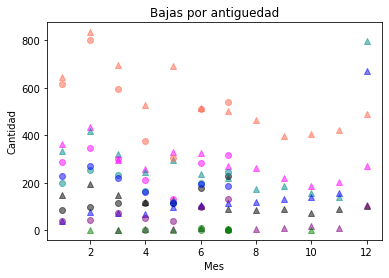

In [149]:
color_={0:"Black",1:"tomato",2:"fuchsia",3:"darkcyan",4:"Blue",5:"purple",6:"Green"}
fig, ax = plt.subplots()
for ciclo in list(range (2019,2021)):     
  if ciclo == 2019:  
    ax.scatter(
    x_mes[ c0[:,0]==1,0],
    Y[ c0[:,0]==1,0],
    c= color_[0],
    marker = "^",
    label = ciclo,
    alpha=0.5) 

    ax.scatter(
    x_mes[ c1[:,0]==1,0],
    Y[ c1[:,0]==1,0],
    c= color_[1],
    marker = "^",
    label = ciclo,
    alpha=0.5) 

    ax.scatter(
    x_mes[ c2[:,0]==1,0],
    Y[ c2[:,0]==1,0],
    c= color_[2],
    marker = "^",
    label = ciclo,
    alpha=0.5) 

    ax.scatter(
    x_mes[ c3[:,0]==1,0],
    Y[ c3[:,0]==1,0],
    c= color_[3],
    marker = "^",
    label = ciclo,
    alpha=0.5) 

    ax.scatter(
    x_mes[ c4[:,0]==1,0],
    Y[ c4[:,0]==1,0],
    c= color_[4],
    marker = "^",
    label = ciclo,
    alpha=0.5) 

    ax.scatter(
    x_mes[ c5[:,0]==1,0],
    Y[ c5[:,0]==1,0],
    c= color_[5],
    marker = "^",
    label = ciclo,
    alpha=0.5) 

    ax.scatter(
    x_mes[ c6[:,0]==1,0],
    Y[ c6[:,0]==1,0],
    c= color_[6],
    marker = "^",
    label = ciclo,
    alpha=0.5) 

  else:
    ax.scatter(
    x_mes[ c0[:,0]==2,0],
    Y[ c0[:,0]==2,0],
    c= color_[0],
    marker = "o",
    label = ciclo,
    alpha=0.5)

    ax.scatter(
    x_mes[ c1[:,0]==2,0],
    Y[ c1[:,0]==2,0],
    c= color_[1],
    marker = "o",
    label = ciclo,
    alpha=0.5)

    ax.scatter(
    x_mes[ c2[:,0]==2,0],
    Y[ c2[:,0]==2,0],
    c= color_[2],
    marker = "o",
    label = ciclo,
    alpha=0.5)

    ax.scatter(
    x_mes[ c3[:,0]==2,0],
    Y[ c3[:,0]==2,0],
    c= color_[3],
    marker = "o",
    label = ciclo,
    alpha=0.5)

    ax.scatter(
    x_mes[ c4[:,0]==2,0],
    Y[ c4[:,0]==2,0],
    c= color_[4],
    marker = "o",
    label = ciclo,
    alpha=0.5)

    ax.scatter(
    x_mes[ c5[:,0]==2,0],
    Y[ c5[:,0]==2,0],
    c= color_[5],
    marker = "o",
    label = ciclo,
    alpha=0.5)

    ax.scatter(
    x_mes[ c6[:,0]==2,0],
    Y[ c6[:,0]==2,0],
    c= color_[6],
    marker = "o",
    label = ciclo,
    alpha=0.5)

plt.xlabel('Mes')
plt.ylabel('Cantidad')
plt.title('Bajas por antiguedad')
plt.show()


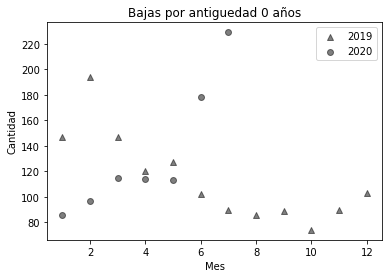

In [135]:
color_={0:"Black",1:"tomato",2:"fuchsia",3:"darkcyan",4:"Blue",5:"purple",6:"Green"}
fig, ax = plt.subplots()
for ciclo in list(range (2019,2021)):     
  if ciclo == 2019:  
    ax.scatter(
    x_mes[ c0[:,0]==1,0],
    Y[ c0[:,0]==1,0],
    c= color_[0],
    marker = "^",
    label = ciclo,
    alpha=0.5)     

  else:
    ax.scatter(
    x_mes[ c0[:,0]==2,0],
    Y[ c0[:,0]==2,0],
    c= color_[0],
    marker = "o",
    label = ciclo,
    alpha=0.5)


plt.legend()
plt.xlabel('Mes')
plt.ylabel('Cantidad')
plt.title('Bajas por antiguedad 0 años')
plt.show()

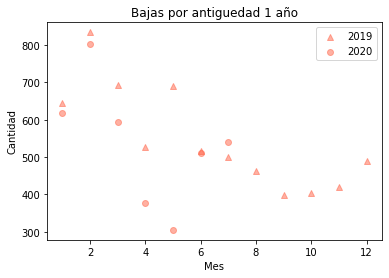

In [136]:
color_={0:"Black",1:"tomato",2:"fuchsia",3:"darkcyan",4:"Blue",5:"purple",6:"Green"}
fig, ax = plt.subplots()
for ciclo in list(range (2019,2021)):     
  if ciclo == 2019:  
    ax.scatter(
    x_mes[ c1[:,0]==1,0],
    Y[ c1[:,0]==1,0],
    c= color_[1],
    marker = "^",
    label = ciclo,
    alpha=0.5)     

  else:
    ax.scatter(
    x_mes[ c1[:,0]==2,0],
    Y[ c1[:,0]==2,0],
    c= color_[1],
    marker = "o",
    label = ciclo,
    alpha=0.5)


plt.legend()
plt.xlabel('Mes')
plt.ylabel('Cantidad')
plt.title('Bajas por antiguedad 1 año')
plt.show()

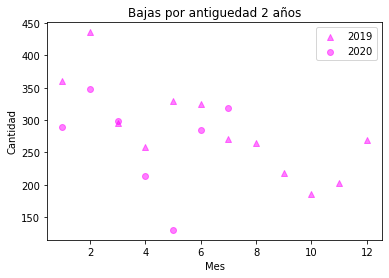

In [137]:
color_={0:"Black",1:"tomato",2:"fuchsia",3:"darkcyan",4:"Blue",5:"purple",6:"Green"}
fig, ax = plt.subplots()
for ciclo in list(range (2019,2021)):     
  if ciclo == 2019:  
    ax.scatter(
    x_mes[ c2[:,0]==1,0],
    Y[ c2[:,0]==1,0],
    c= color_[2],
    marker = "^",
    label = ciclo,
    alpha=0.5)     

  else:
    ax.scatter(
    x_mes[ c2[:,0]==2,0],
    Y[ c2[:,0]==2,0],
    c= color_[2],
    marker = "o",
    label = ciclo,
    alpha=0.5)


plt.legend()
plt.xlabel('Mes')
plt.ylabel('Cantidad')
plt.title('Bajas por antiguedad 2 años')
plt.show()

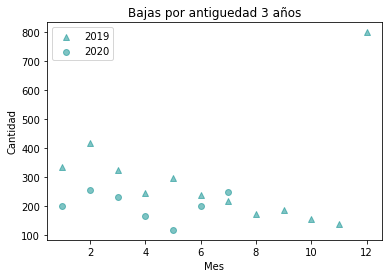

In [138]:
color_={0:"Black",1:"tomato",2:"fuchsia",3:"darkcyan",4:"Blue",5:"purple",6:"Green"}
fig, ax = plt.subplots()
for ciclo in list(range (2019,2021)):     
  if ciclo == 2019:  
    ax.scatter(
    x_mes[ c3[:,0]==1,0],
    Y[ c3[:,0]==1,0],
    c= color_[3],
    marker = "^",
    label = ciclo,
    alpha=0.5)     

  else:
    ax.scatter(
    x_mes[ c3[:,0]==2,0],
    Y[ c3[:,0]==2,0],
    c= color_[3],
    marker = "o",
    label = ciclo,
    alpha=0.5)


plt.legend()
plt.xlabel('Mes')
plt.ylabel('Cantidad')
plt.title('Bajas por antiguedad 3 años')
plt.show()

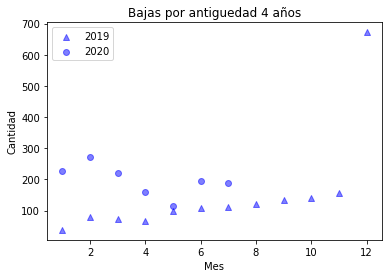

In [139]:
color_={0:"Black",1:"tomato",2:"fuchsia",3:"darkcyan",4:"Blue",5:"purple",6:"Green"}
fig, ax = plt.subplots()
for ciclo in list(range (2019,2021)):     
  if ciclo == 2019:  
    ax.scatter(
    x_mes[ c4[:,0]==1,0],
    Y[ c4[:,0]==1,0],
    c= color_[4],
    marker = "^",
    label = ciclo,
    alpha=0.5)     

  else:
    ax.scatter(
    x_mes[ c4[:,0]==2,0],
    Y[ c4[:,0]==2,0],
    c= color_[4],
    marker = "o",
    label = ciclo,
    alpha=0.5)


plt.legend()
plt.xlabel('Mes')
plt.ylabel('Cantidad')
plt.title('Bajas por antiguedad 4 años')
plt.show()

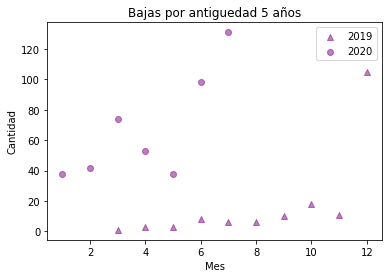

In [144]:
color_={0:"Black",1:"tomato",2:"fuchsia",3:"darkcyan",4:"Blue",5:"purple",6:"Green"}
fig, ax = plt.subplots()
for ciclo in list(range (2019,2021)):     
  if ciclo == 2019:  
    ax.scatter(
    x_mes[ c5[:,0]==1,0],
    Y[ c5[:,0]==1,0],
    c= color_[5],
    marker = "^",
    label = ciclo,
    alpha=0.5)     

  else:
    ax.scatter(
    x_mes[ c5[:,0]==2,0],
    Y[ c5[:,0]==2,0],
    c= color_[5],
    marker = "o",
    label = ciclo,
    alpha=0.5)


plt.legend()
plt.xlabel('Mes')
plt.ylabel('Cantidad')
plt.title('Bajas por antiguedad 5 años')
plt.show()

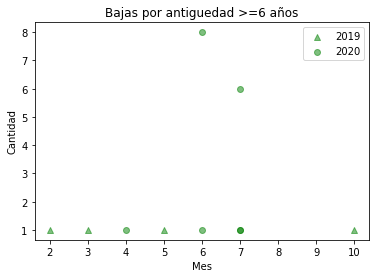

In [141]:
color_={0:"Black",1:"tomato",2:"fuchsia",3:"darkcyan",4:"Blue",5:"purple",6:"Green"}
fig, ax = plt.subplots()
for ciclo in list(range (2019,2021)):     
  if ciclo == 2019:  
    ax.scatter(
    x_mes[ c6[:,0]==1,0],
    Y[ c6[:,0]==1,0],
    c= color_[6],
    marker = "^",
    label = ciclo,
    alpha=0.5)     

  else:
    ax.scatter(
    x_mes[ c6[:,0]==2,0],
    Y[ c6[:,0]==2,0],
    c= color_[6],
    marker = "o",
    label = ciclo,
    alpha=0.5)


plt.legend()
plt.xlabel('Mes')
plt.ylabel('Cantidad')
plt.title('Bajas por antiguedad >=6 años')
plt.show()

## Modelo Polinómico

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# 